# Adult Census Income EDA & Prediction
- Goal: classify whether income is less than or more than $50,000 based on population data,

|column|description|
|:--:|:--:|
|id|샘플 아이디|
|age|나이|
|workclass|일 유형|
|fnlwgt|CPS(Current Population Survey) 가중치|
|education|교육수준|
|education.num|교육수준 번호|
|marital.status|결혼 상태|
|occupation|직업|
|relationship|가족관계|
|race|인종|
|sex|성별|
|capital.gain|자본 이익|
|capital.loss|자본 손실|
|hours.per.week|주당 근무시간|
|native.country|본 국적|
|target|소득|
					   
dataset: https://www.kaggle.com/datasets/uciml/adult-census-income

# 1. Import dependencies

In [229]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

# 2. Import dataset

In [187]:
df = pd.read_csv('data/adult.csv')

# 3. Exploratory Data Analysis
## Overview

In [ ]:
profile = ProfileReport(df, title="Profiling Report") # pip install ydata-profiling ipywidgets
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [189]:
profile.to_file("dataset_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1. Check shape of dataset

In [190]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the dataset.

### 3.2. Preview dataset

In [191]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 3.3. View summary of dataframe

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [193]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as NaN values.

### 3.4. Encode ? as NaNs and Again check the summary of dataframe

In [194]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


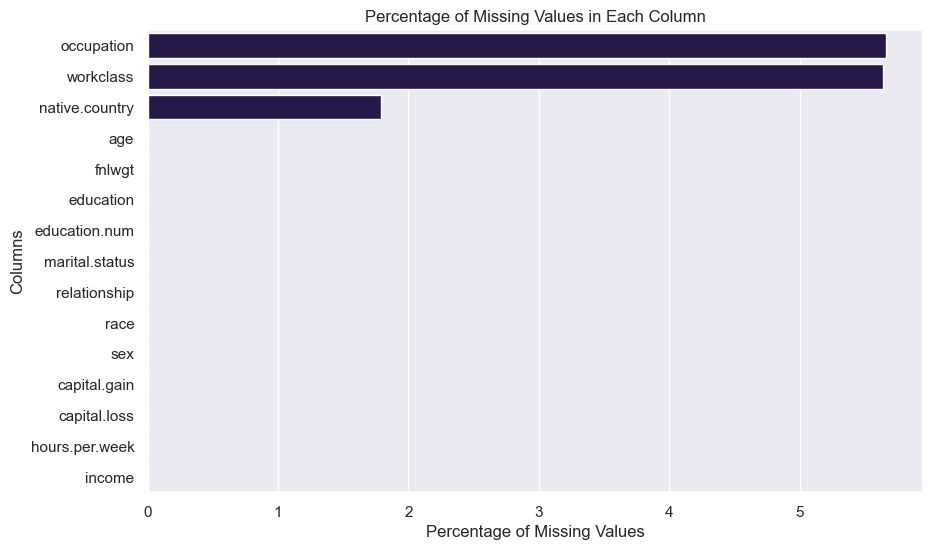

In [195]:
missing_values_percentage = df.isnull().mean() * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value.

### 3.5. Impute missing values with mode

In [196]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [197]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

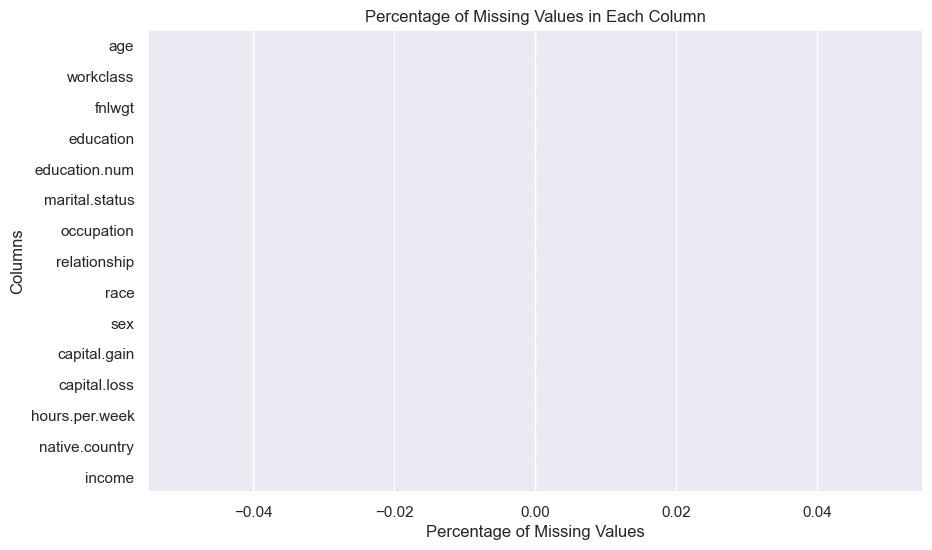

In [198]:
missing_values_percentage = df.isnull().mean() * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

Now we can see that there are no missing values in the dataset.

### 3.6. Check the duplicate values

In [199]:
df[df.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
9305,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [200]:
df.duplicated().sum()

24

In [201]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [202]:
df.shape

(32537, 15)

In [203]:
# Inspect useless features
df.nunique().sort_values()

sex                   2
income                2
race                  5
relationship          6
marital.status        7
workclass             8
occupation           14
education            16
education.num        16
native.country       41
age                  73
capital.loss         92
hours.per.week       94
capital.gain        119
fnlwgt            21648
dtype: int64

In [204]:
df = df.drop(columns=['fnlwgt']) # 데이터 분석에 크게 기여하지 않는 경우가 많으므로 이를 제거
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [205]:
df = df.rename(columns={
    'marital.status': 'marital_status',
    'education.num': 'education_num',
    'native.country': 'native_country',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week'
})

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

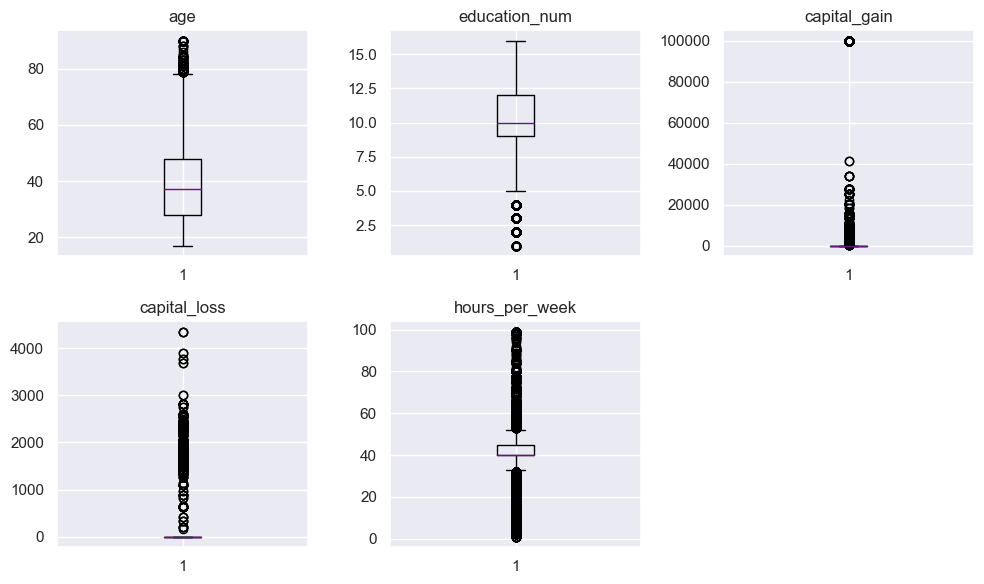

In [206]:
numeric_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

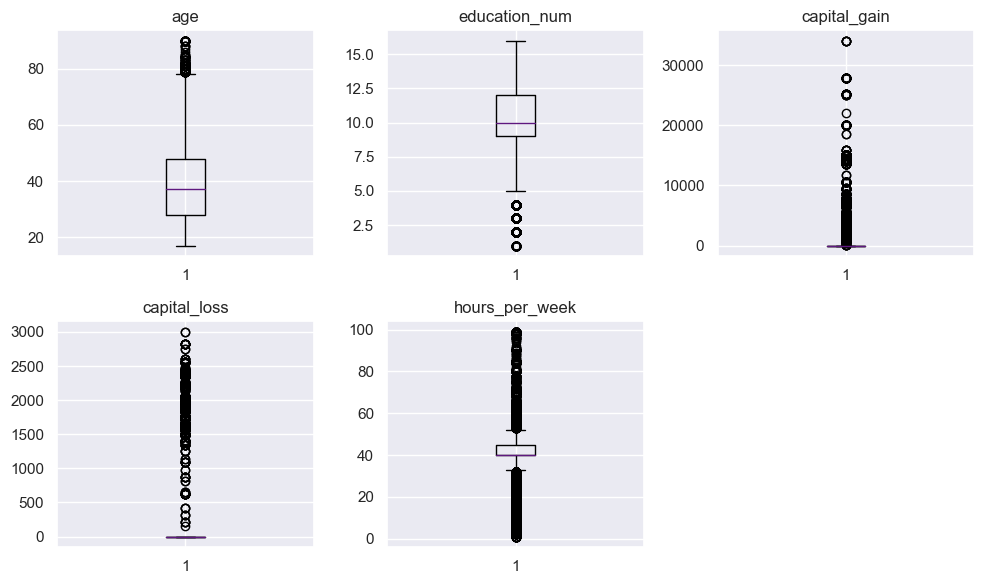

In [207]:
condition = (df['capital_gain'] > 40000) | (df['capital_loss'] > 3500)
df = df[~condition]

numeric_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Visualization

Text(0.5, 1.0, 'Correlation Matrix')

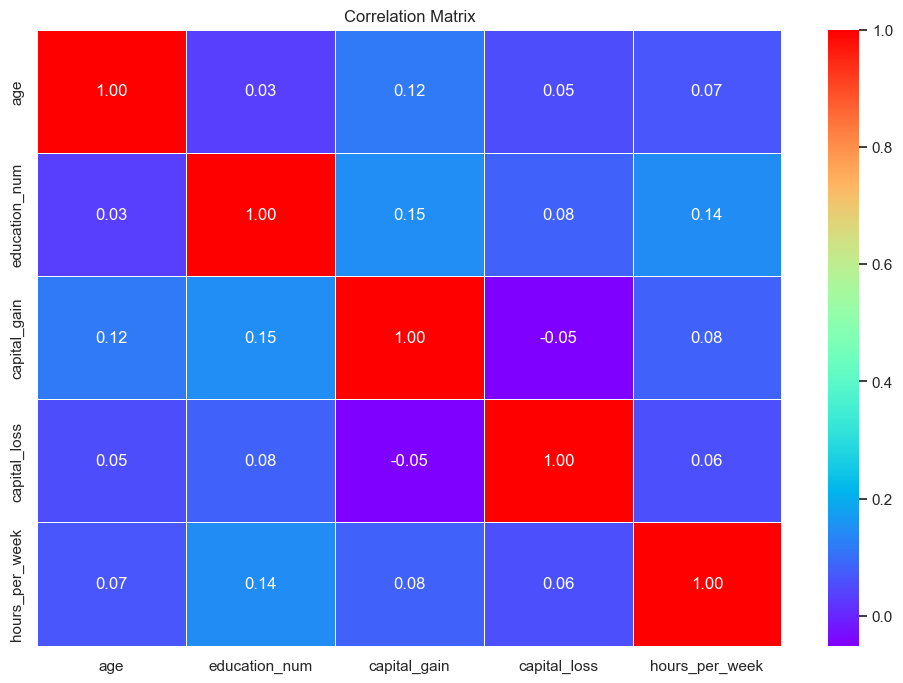

In [208]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

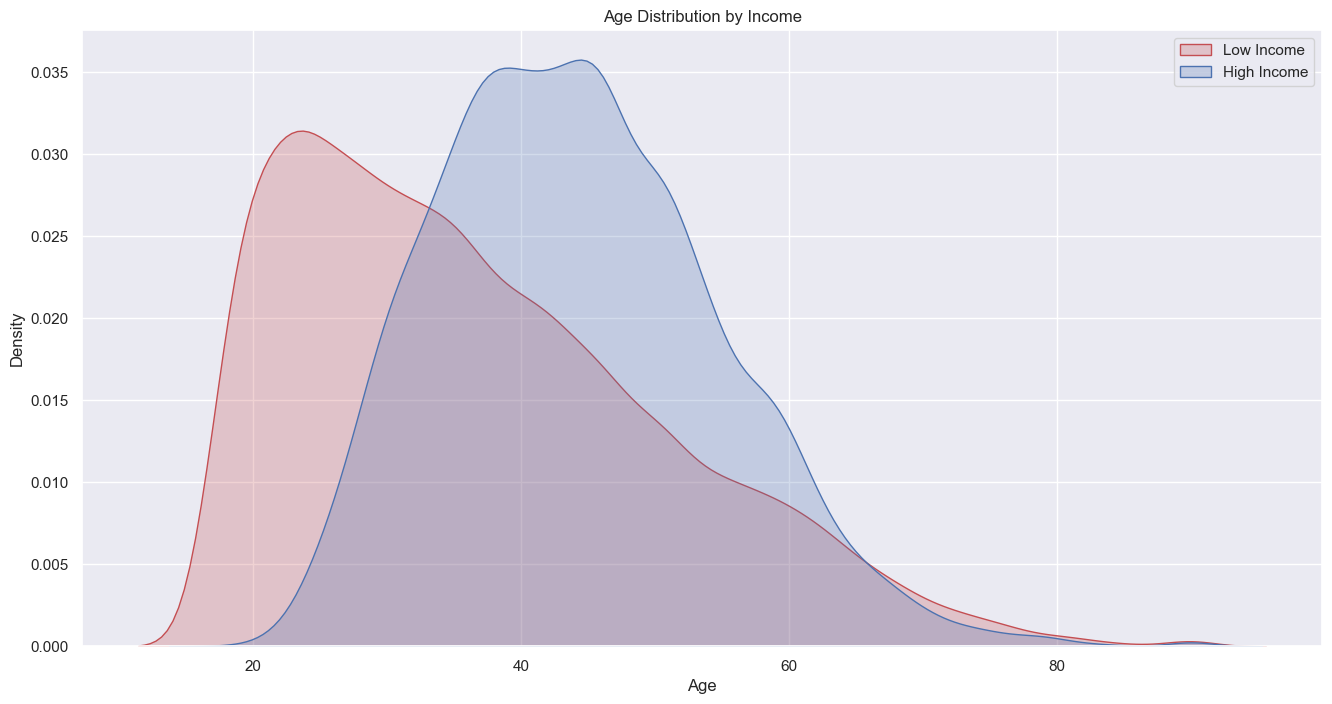

In [209]:
plt.figure(figsize=(16, 8))

sns.set_theme(style="darkgrid")
sns.set_palette("magma")

sns.kdeplot(data=df[df['income'] == '<=50K']['age'], shade=True, color="r", label="Low Income")
sns.kdeplot(data=df[df['income'] == '>50K']['age'], shade=True, color="b", label="High Income")

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Income')

plt.legend()

plt.show()

<Axes: xlabel='age', ylabel='Density'>

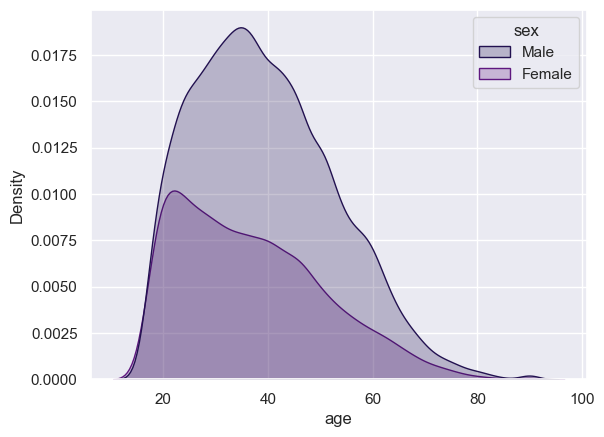

In [210]:
sns.kdeplot(x='age', hue ='sex', data=df, fill = True)

In [211]:
# workclass
df.groupby('workclass').size()

workclass
Federal-gov           958
Local-gov            2087
Never-worked            7
Private             24415
Self-emp-inc         1080
Self-emp-not-inc     2510
State-gov            1296
Without-pay            14
dtype: int64

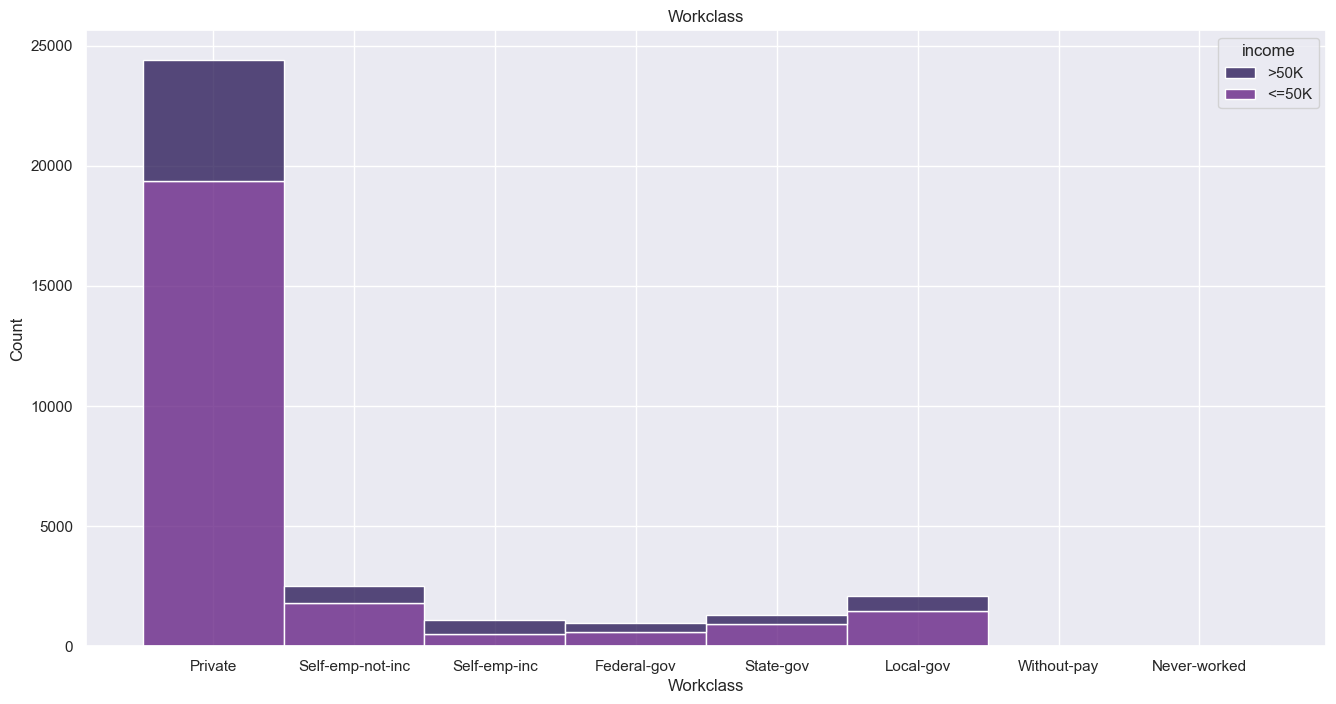

In [212]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='workclass', hue='income', multiple='stack')

plt.xlabel('Workclass')
plt.title('Workclass')

plt.show()

In [213]:
df.groupby('education').size()

education
10th              930
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           644
9th               513
Assoc-acdm       1066
Assoc-voc        1381
Bachelors        5312
Doctorate         400
HS-grad         10467
Masters          1703
Preschool          49
Prof-school       530
Some-college     7266
dtype: int64

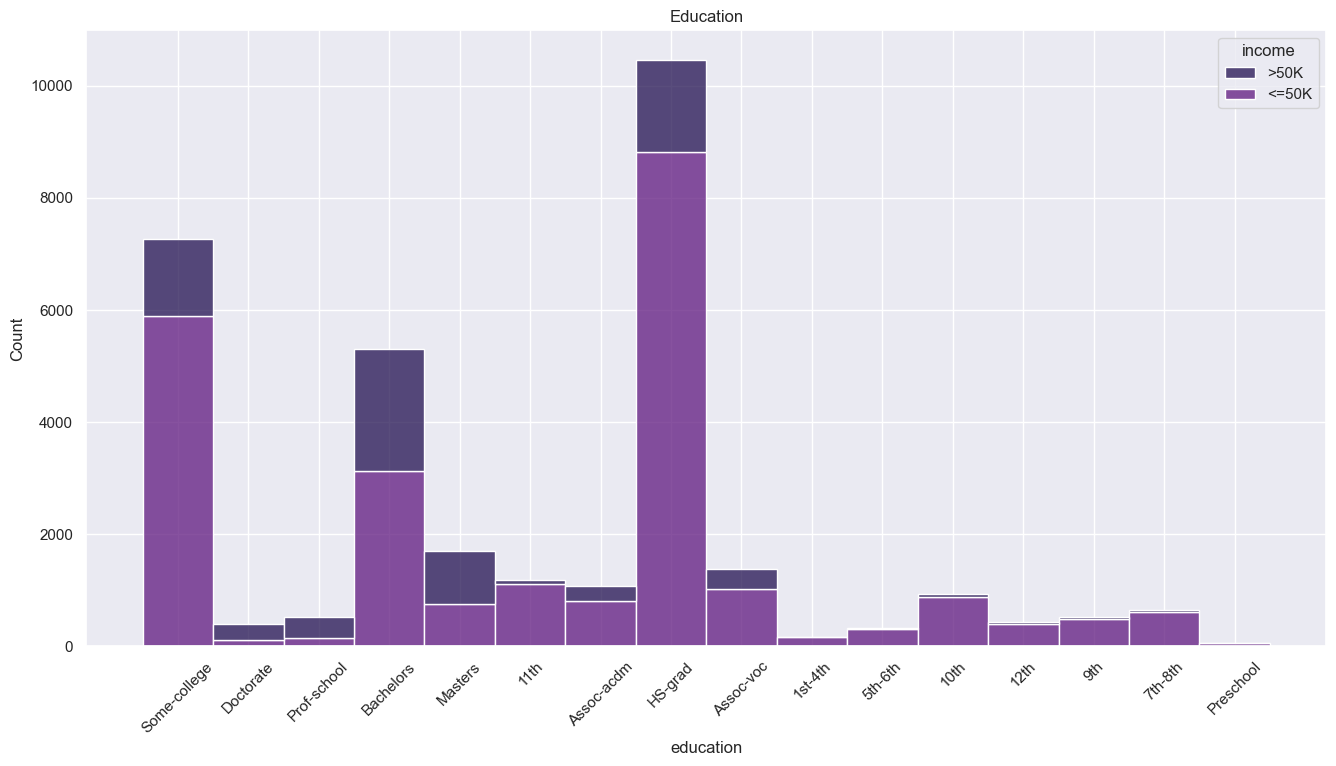

In [214]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='education', hue='income', multiple='stack')

plt.xlabel('education')
plt.title('Education')

plt.xticks(rotation=45)

plt.show()

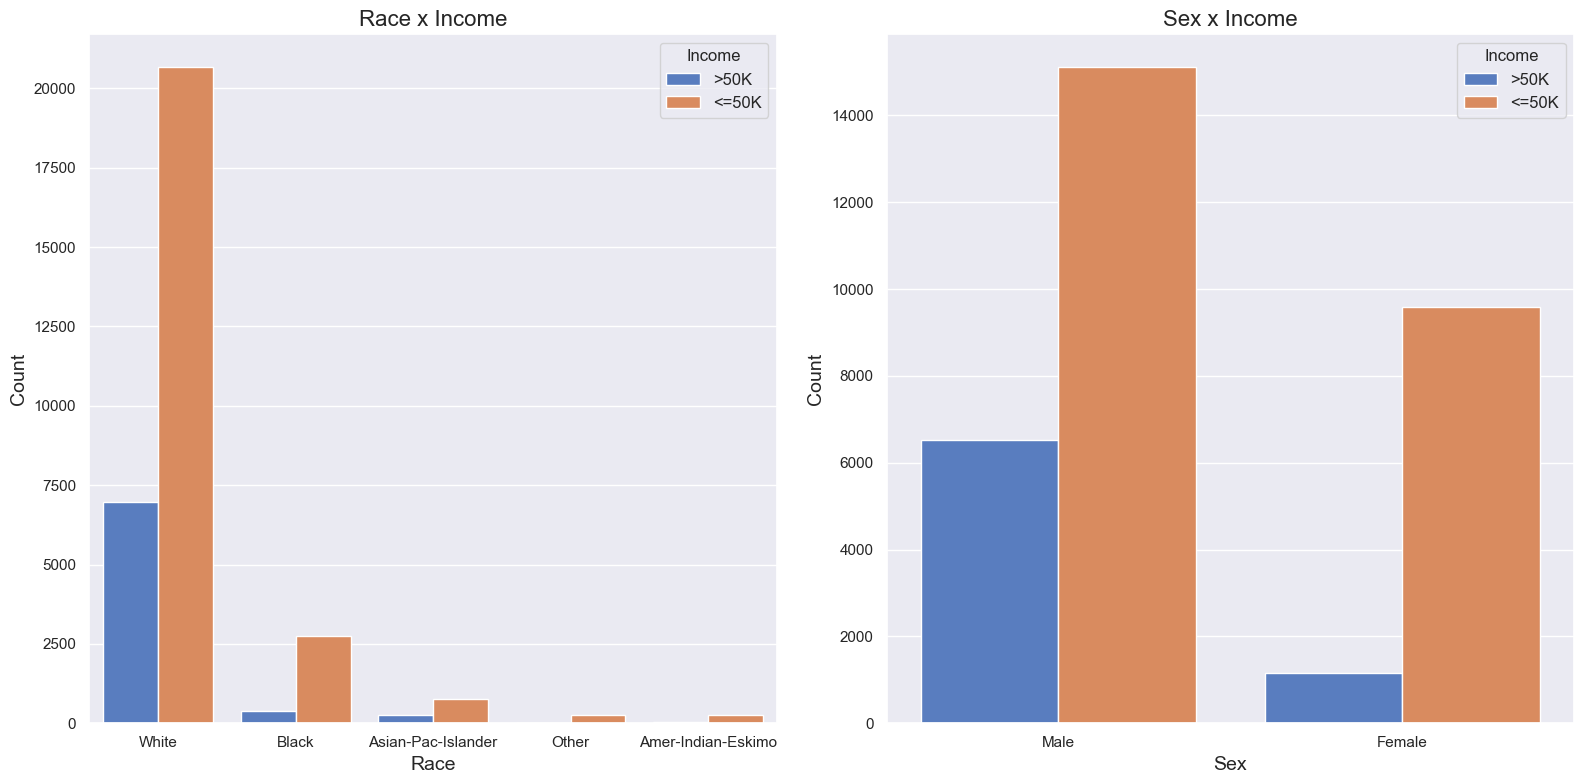

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=df, x='race', hue='income', palette='muted', ax=axes[0])
axes[0].set_title('Race x Income', fontsize=16)
axes[0].set_xlabel('Race', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Income', fontsize=12)

sns.countplot(data=df, x='sex', hue='income', palette='muted', ax=axes[1])
axes[1].set_title('Sex x Income', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Income', fontsize=12)

plt.tight_layout()

plt.show()

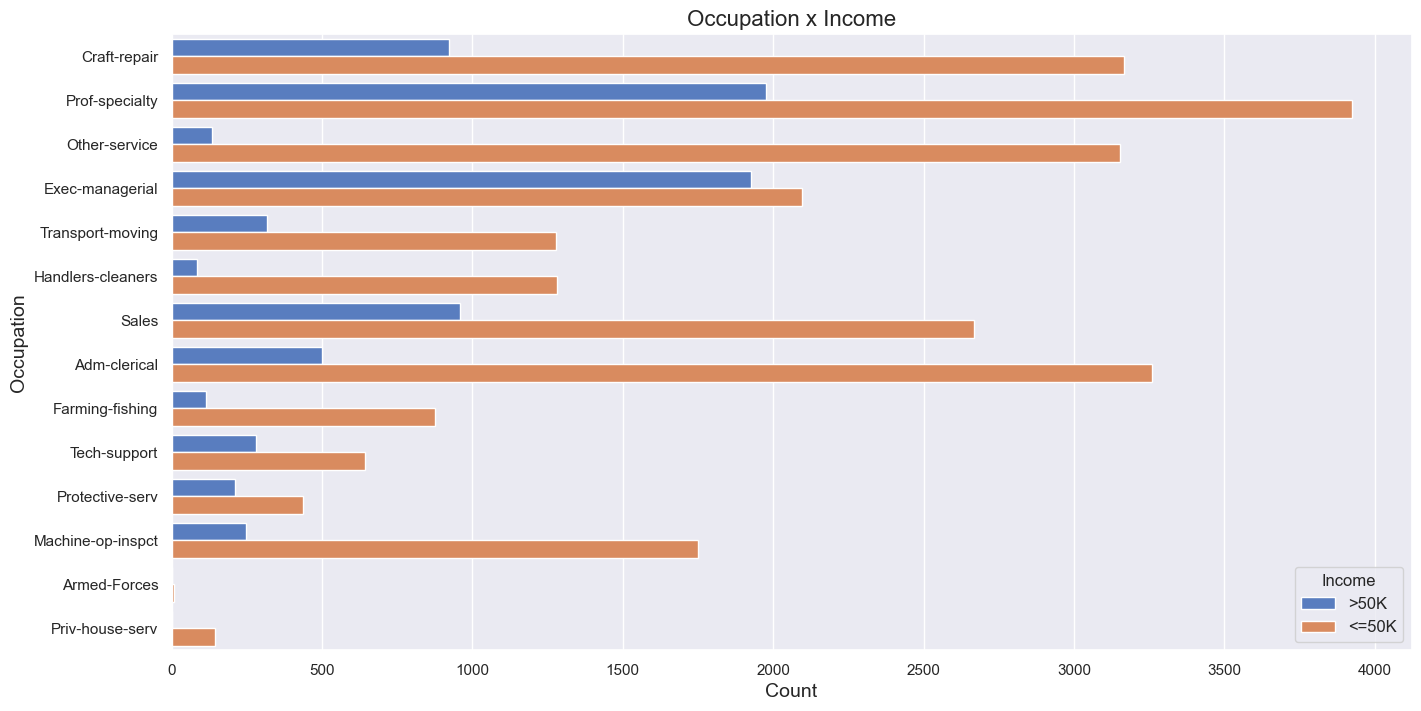

In [216]:
plt.figure(figsize=(16, 8))

sns.countplot(data=df, y='occupation', hue='income', palette='muted')

plt.title('Occupation x Income', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)

plt.legend(title='Income', fontsize=12)

plt.show()

# 5. Modeling

In [217]:
label_encoder = LabelEncoder()
categorical_columns = ['income', 'workclass', 'education', 'marital_status', 'occupation', 'relationship',
                       'race', 'sex', 'native_country']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [218]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
9,41,3,15,10,4,2,4,4,1,0,3004,60,38,1
10,45,3,10,16,0,9,4,2,0,0,3004,35,38,1
11,38,5,14,15,4,9,1,4,1,0,2824,45,38,1
12,52,3,9,13,6,7,1,4,0,0,2824,20,38,1
13,32,3,12,14,5,3,1,4,1,0,2824,55,38,1


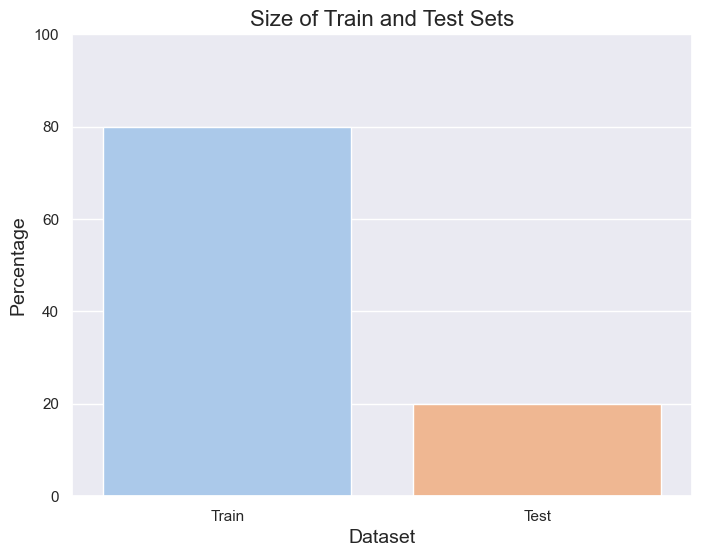

In [219]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['income']), df['income'],
                                                    test_size=0.2, random_state=42)
total_size = len(df)
train_size = len(x_train)
test_size = len(x_test)

train_percent = (train_size / total_size) * 100
test_percent = (test_size / total_size) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=['Train', 'Test'], y=[train_percent, test_percent], palette='pastel')
plt.title('Size of Train and Test Sets', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)
plt.show()

In [220]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [221]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [222]:
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.001, 0.01, 0.1],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
    },
    {
        'classifier': [RidgeClassifier],
    },
    {
        'classifier': [SVC],
    },
]

In [223]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.001, 0.01, 0.1]},
                         {'classifier': [DecisionTreeClassifier(max_depth=10)],
                          'classifier__max_depth': [None, 10, 20]},
                         {'classifier': [<class 'sklearn.linear_model._ridge.RidgeClassifier'>]},
                         {'classifier': [<class 'sklearn.svm._classes.SVC'>]}],
             verbose=2)

In [224]:
print(f"Best Model: {grid_search.best_estimator_['classifier']}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Model: DecisionTreeClassifier(max_depth=10)
Best Parameters: {'classifier': DecisionTreeClassifier(max_depth=10), 'classifier__max_depth': 10}
Best Score: 0.8523926102912414


In [225]:
print("Predictions for 15 samples in the test set:")
correct = 0
incorrect = 0
for i in range(15):
    if y_test.iloc[i] == y_pred[i]:
        print(f"Correct! : Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
        correct += 1
    else:
        print(f"Incorrect! : Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
        incorrect += 1

total = correct + incorrect

print(f'Correct: {correct}, Incorrect: {incorrect} / Total: {total}')
print(f'Estimated accuracy: {correct / total :.2f}')

Predictions for 15 samples in the test set:
Correct! : Sample 1: Actual - 0, Predicted - 0
Correct! : Sample 2: Actual - 0, Predicted - 0
Correct! : Sample 3: Actual - 0, Predicted - 0
Correct! : Sample 4: Actual - 0, Predicted - 0
Correct! : Sample 5: Actual - 0, Predicted - 0
Correct! : Sample 6: Actual - 0, Predicted - 0
Correct! : Sample 7: Actual - 0, Predicted - 0
Incorrect! : Sample 8: Actual - 1, Predicted - 0
Correct! : Sample 9: Actual - 0, Predicted - 0
Incorrect! : Sample 10: Actual - 1, Predicted - 0
Correct! : Sample 11: Actual - 0, Predicted - 0
Correct! : Sample 12: Actual - 0, Predicted - 0
Correct! : Sample 13: Actual - 1, Predicted - 1
Correct! : Sample 14: Actual - 1, Predicted - 1
Correct! : Sample 15: Actual - 1, Predicted - 1
Correct: 13, Incorrect: 2 / Total: 15
Estimated accuracy: 0.87


In [226]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Test Set Accuracy: 0.8582020389249305
Precision: 0.7482817869415808
Recall: 0.5822192513368984
F1-Score: 0.6548872180451129


# 6. Hyperparameter Tuning & Re-Evaluation

In [233]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear'],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
    {
        'classifier': [RidgeClassifier()],
        'classifier__alpha': [0.1, 1.0, 10.0],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5],
        'classifier__weights': ['uniform', 'distance'],
    },
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)
print(f"Best Model: {grid_search.best_estimator_['classifier']}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Model: RandomForestClassifier(max_depth=20, min_samples_leaf=2)
Best Parameters: {'classifier': RandomForestClassifier(max_depth=20, min_samples_leaf=2), 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.8627043835330174


In [234]:
print("Predictions for 15 samples in the test set:")
correct = 0
incorrect = 0
for i in range(15):
    if y_test.iloc[i] == y_pred[i]:
        print(f"Correct! : Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
        correct += 1
    else:
        print(f"Incorrect! : Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
        incorrect += 1

total = correct + incorrect

print(f'Correct: {correct}, Incorrect: {incorrect} / Total: {total}')
print(f'Estimated accuracy: {correct / total :.2f}')

Predictions for 15 samples in the test set:
Correct! : Sample 1: Actual - 0, Predicted - 0
Correct! : Sample 2: Actual - 0, Predicted - 0
Correct! : Sample 3: Actual - 0, Predicted - 0
Correct! : Sample 4: Actual - 0, Predicted - 0
Correct! : Sample 5: Actual - 0, Predicted - 0
Correct! : Sample 6: Actual - 0, Predicted - 0
Correct! : Sample 7: Actual - 0, Predicted - 0
Incorrect! : Sample 8: Actual - 1, Predicted - 0
Correct! : Sample 9: Actual - 0, Predicted - 0
Incorrect! : Sample 10: Actual - 1, Predicted - 0
Correct! : Sample 11: Actual - 0, Predicted - 0
Correct! : Sample 12: Actual - 0, Predicted - 0
Correct! : Sample 13: Actual - 1, Predicted - 1
Correct! : Sample 14: Actual - 1, Predicted - 1
Correct! : Sample 15: Actual - 1, Predicted - 1
Correct: 13, Incorrect: 2 / Total: 15
Estimated accuracy: 0.87


In [235]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Test Set Accuracy: 0.8682421995675008
Precision: 0.7703952901597981
Recall: 0.6122994652406417
F1-Score: 0.6823091247672254
[CV] END classifier=LogisticRegression(), classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier=LogisticRegression(), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5; tota

[CV] END classifier=LogisticRegression(), classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier=LogisticRegression(), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=2, cla

[CV] END classifier=LogisticRegression(), classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.2s
[CV] END classifier=DecisionTreeClassifier(), classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2; total time=   0.2s
[CV] END classifier=RidgeClassifier(), classifier__alpha=0.1; total time=   0.0s
[CV]

### 하이퍼 파라미터 튜닝 전
- Test Set Accuracy: 0.8582020389249305
- Precision: 0.7482817869415808
- Recall: 0.5822192513368984
- F1-Score: 0.6548872180451129